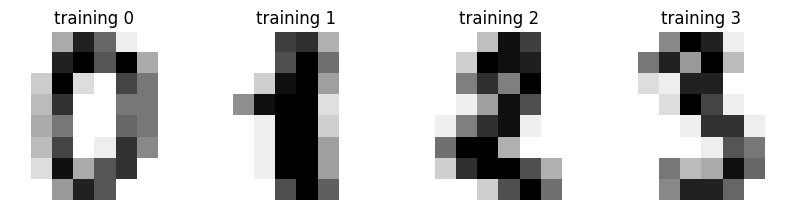

In [5]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

fig, axes = plt.subplots(nrows = 1, ncols=4, figsize=(10,3))

for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(F"training {label}")

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np

X_digits, Y_digits = load_digits(return_X_y=True)

X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, test_size=0.5)
scaler = MinMaxScaler()

sacled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)
logistics = LogisticRegressionCV(penalty='l2', max_iter=10000)

knn.fit(sacled_X_train, Y_train)
logistics.fit(sacled_X_train, Y_train)

Y_knn = knn.predict(scaled_X_test)
Y_log = logistics.predict(scaled_X_test)

print(classification_report(Y_test, Y_log))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        93
           1       0.86      0.98      0.91        88
           2       0.96      0.93      0.95        87
           3       0.98      0.97      0.97        96
           4       0.95      0.99      0.97        89
           5       0.93      0.98      0.95        91
           6       0.99      0.96      0.97       100
           7       1.00      0.97      0.99        79
           8       0.91      0.83      0.87        86
           9       0.95      0.93      0.94        90

    accuracy                           0.95       899
   macro avg       0.95      0.95      0.95       899
weighted avg       0.95      0.95      0.95       899



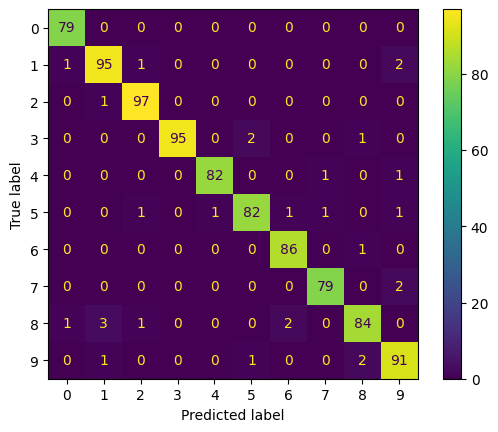

In [11]:
cm = confusion_matrix(Y_test, Y_log)
ConfusionMatrixDisplay(cm).plot()

[Text(0.5, 1.0, 'elbow'), Text(0.5, 0, 'k'), Text(0, 0.5, 'error')]

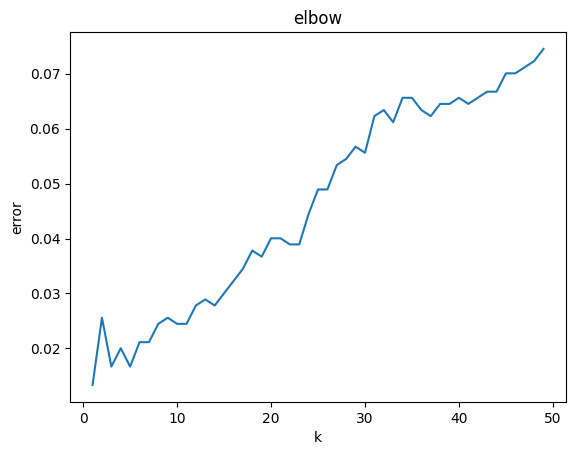

In [19]:
from sklearn.metrics import accuracy_score

error = 1 - accuracy_score(Y_test, Y_knn)
error_list = list()

for k in range(1, 50):
    model_KNN = KNeighborsClassifier(n_neighbors=k)
    model_KNN.fit(sacled_X_train, Y_train)
    Y_hat = model_KNN.predict(scaled_X_test)
    error_list += [1-accuracy_score(Y_test,Y_hat)]
    
fig, ax = plt.figure(), plt.axes()

ax.plot(range(1, len(error_list)+1), error_list)
ax.set(title="elbow", xlabel="k", ylabel="error")

